In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
gdp_df = pd.read_csv('C:\\Users\\jtbes\\Documents\\DA8\\Projects\\gdp-and-internet-usage-jtbest\\data\\gdp_percapita.csv')

In [17]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


gdp_df has 4 columns and 7176 rows. Country - object; Year - int64; Value - float64; Value Footnotes - float64

In [20]:
gdp_df.drop(labels=['Value Footnotes'],axis=1, inplace=True)

In [27]:
gdp_df.rename(columns={'Value': 'GDP_Per_Capita'}, inplace=True)
gdp_df.rename(columns={'Country or Area': 'Countries'}, inplace=True)

In [28]:
gdp_df.loc[gdp_df['Year'].notnull()]

,Countries,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [43]:

gdp_df['Countries'].value_counts()
all_years = gdp_df.groupby('Countries').filter(lambda x: len(x)==31)
print(len(all_years)/(gdp_df['Year'].max()-gdp_df['Year'].min()+1))

205.0


205 countries have data for all years listed. 

In [41]:
gdp_df["Countries"].nunique()

242

In [47]:
gdp_df['Countries'].value_counts(ascending=True).reset_index().head(10)

,index,Countries
0,Somalia,8
1,Djibouti,8
2,Turks and Caicos Islands,10
3,Sint Maarten (Dutch part),10
4,Kosovo,13
5,Cayman Islands,15
6,Nauru,17
7,Afghanistan,19
8,SÃ£o TomÃ© and Principe,20
9,Timor-Leste,21


The countries listed above, for example, Somalia, Djibouti, Turks and Caicos, Sint Maarten, etc. have greater proportions of missing years. 

In [48]:
gdp_df['Year'].value_counts(ascending=True).reset_index()

,index,Year
0,1990,206
1,1991,207
2,1992,208
3,1993,209
4,1994,211
5,1995,222
6,1996,222
7,1997,226
8,1998,226
9,1999,227


More countries are added to this dataframe as the years go on. 

(array([30., 35., 17., 10., 18., 19., 17., 11.,  7.,  6.,  3.,  8.,  4.,
         5.,  3.,  2.,  3.,  5.,  7.,  3.,  4.,  2.,  3.,  2.,  3.,  2.,
         1.,  2.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   731.06407364,   2967.58898161,   5204.11388957,   7440.63879754,
          9677.1637055 ,  11913.68861346,  14150.21352143,  16386.73842939,
         18623.26333735,  20859.78824532,  23096.31315328,  25332.83806124,
         27569.36296921,  29805.88787717,  32042.41278513,  34278.9376931 ,
         36515.46260106,  38751.98750902,  40988.51241699,  43225.03732495,
         45461.56223291,  47698.08714088,  49934.61204884,  52171.1369568 ,
         54407.66186477,  56644.18677273,  58880.71168069,  61117.23658866,
         63353.76149662,  65590.28640459,  67826.81131255,  70063.33622051,
         72299.86112848,  74536.38603644,  76772.9109444 ,  79009.43585237,
         81245.96076033,  83482.

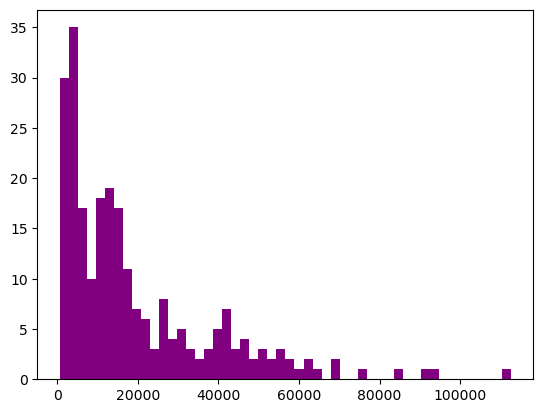

In [65]:
gdp_2020 = gdp_df[(gdp_df['Year']==2020)]
plt.hist(gdp_2020['GDP_Per_Capita'], 50, color = 'purple')

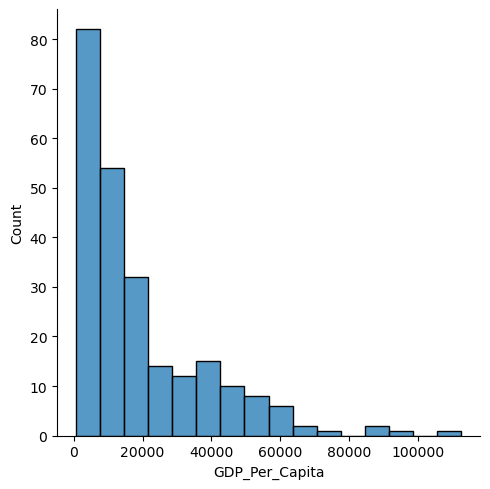

In [68]:
sns.displot(gdp_2020["GDP_Per_Capita"])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

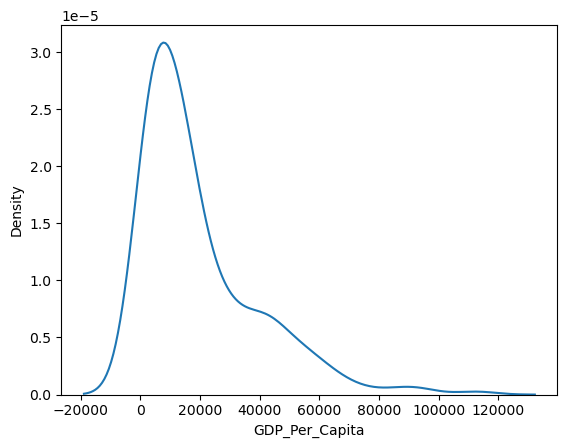

In [69]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

C:\Users\jtbes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

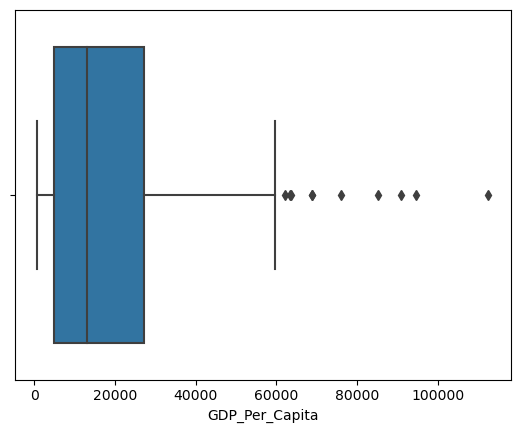

In [70]:
sns.boxplot(gdp_2020['GDP_Per_Capita'])

C:\Users\jtbes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

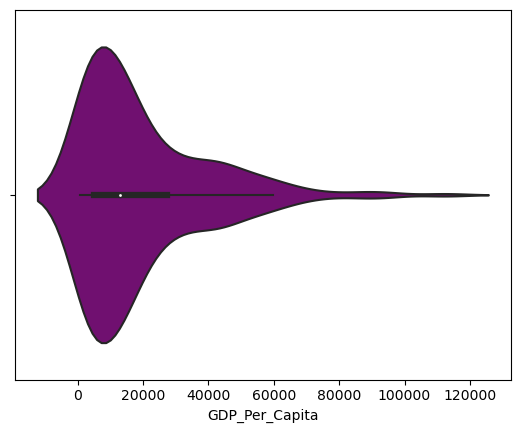

In [73]:
sns.violinplot(gdp_2020['GDP_Per_Capita'], color = 'purple')

These plots all help visualize the distribution of data for 2020. Many countries clustered around 20,000, with a small number of outliers with much higher values. 

The box plot is valuable becuase it identified quartile values as well as potential outliers. 